In [3]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD
# http://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html
import numpy as np
import math
import matplotlib.pyplot as plt
import string
import random

from random_words import RandomWords
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

from sklearn import linear_model
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

N = 1000
alphabet = string.ascii_lowercase + '#' + '.'
D = len(alphabet)
z = np.ones(N)

# past is encoded
past_tense = open("wickle_train/ed1000.txt", 'r').read().strip().split()
words = [pt[:len(pt)-2] for pt in past_tense]

test_past_tense = past_tense[:100]
test_words = words[:100]

past_tense = past_tense[100:]
words = words[100:]


RI_pres = np.random.rand(D, N)
RI_pres = np.where(RI_pres>0.5, 1, -1)

RI_past = np.random.rand(D, N)
RI_past = np.where(RI_past>0.5, 1, -1)

In [4]:
def encode(s, RI, cluster_size=3):
    s = "#"+s+"."
    #global RI
    #global N
    #global D
    #global alphabet
    z = np.zeros(N)
    count = 0
    for i in range(len(s)-cluster_size):
        count += 1
        l = np.ones(N)
        for j in s[i:i+cluster_size]:
            l = np.multiply(RI[alphabet.index(j), :], l)
            l = np.roll(l, 1)
        z += l

    return 2*(z + 0.1*(np.random.rand(N) - 0.5) > 0) - 1#np.where(z/count > 0, 1, -1)

def encodes(words, past_tense):
    seen = []
    for i in range(len(words)):
        enc = encode(words[i], RI_pres, 3)
        enc_past = encode(past_tense[i], RI_past, 3)
        seen.append((enc, enc_past))
    #plt.figure()
    #plt.plot(enc[:50])
    #print enc.shape
    return seen

def map_train(encoded):
    total_vec = np.zeros(N) #psi
    for i in range(len(encoded)):
        total_vec += np.multiply(encoded[i][0], encoded[i][1])
    return total_vec

def predict(model, encoded):
    data1, data3 = np.zeros(len(encoded)), np.zeros(len(encoded))
    total1, total3, count = 0, 0, 0
    
    random_vecs = np.random.randn(len(encoded), N)
    
    for j in range(len(encoded)):
        pair = encoded[j]
        sim1 = np.dot(np.multiply(model, pair[0]), pair[1])
        total1 += sim1

        sim3 = np.dot(np.multiply(model, random_vecs[j,:]), pair[0])
        total3 += sim3

        count += 1
        data1[j] = sim1 #total1/float(count)
        data3[j] = sim3 #total3/float(count)

    return data1, data3

    #plt.figure()
    #plt.plot(data1, label="Average pairwise similarity")
    #plt.ylabel("Average similarity per vector")
    #plt.xlabel("Number of words in model vector")
    #plt.plot(data3, label="Random pairwise similarity")
    #plt.legend(loc=1,prop={'size':10})
    #plt.show()
    

# 0 for present, 1 for past
def similarity_matrix(encoded, tense=0):
    matrix = np.zeros((len(encoded), len(encoded)))
    for i in range(len(encoded)):
        for j in range(len(encoded)):
            matrix[i,j] = encoded[i][tense].T.dot(encoded[i][tense])
    return matrix

jump . bump 244
jump . leap 18
bump . leap 26
bump . bump 1000


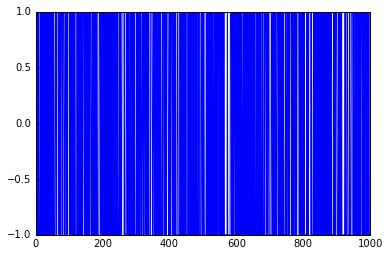

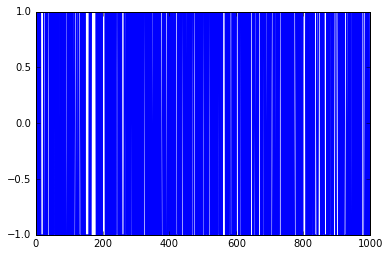

In [8]:
jump_c = encode('jump', RI_pres,3)
bump_c = encode('bump',RI_pres, 3)
leap_c = encode('leap',RI_pres, 3)

print 'jump . bump', np.dot(jump_c, bump_c)
print 'jump . leap', np.dot(jump_c, leap_c)
print 'bump . leap', np.dot(bump_c, leap_c)
print 'bump . bump', np.dot(bump_c, bump_c)
plt.figure()
plt.plot(RI_pres[alphabet.index('a'), :])
plt.figure()
plt.plot(RI_past[alphabet.index('a'), :])

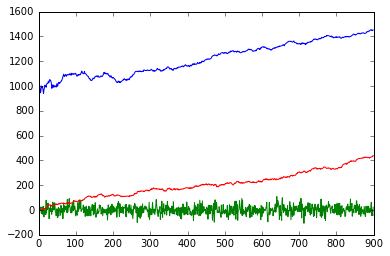

In [9]:
encoded = encodes(words, past_tense)
test_encoded = encodes(test_words, test_past_tense)

test_m = np.arange(1, len(encoded), 1)

train_dot = np.zeros_like(test_m)
test_dot = np.zeros_like(test_m) # np.zeros(test_m.shape)
random_dot = np.zeros_like(test_m)

for im, m in enumerate(test_m):
    map_model = map_train(encoded[:int(m)])
    d1, d3 = predict(map_model, encoded[:int(m)])
    d2, d4 = predict(map_model, test_encoded)
    train_dot[im] = d1.mean()
    test_dot[im] = d2.mean()
    random_dot[im] = d3.mean()
    
    
plt.plot(test_m, train_dot)
plt.plot(test_m, random_dot)
plt.plot(test_m, test_dot)

#print "test similarity"
#predict(map_model, test_encoded)

In [10]:
train_dot

array([1000, 1014, 1000,  967,  945,  969,  987, 1000,  988,  996,  981,
        960,  940,  965,  982,  995, 1007,  995,  999,  990, 1007, 1018,
       1023, 1020, 1021, 1039, 1029, 1031, 1044, 1052, 1043, 1045, 1037,
       1022,  981,  984,  994, 1010, 1007,  991,  989, 1001, 1002,  998,
        995, 1001,  991, 1007, 1020, 1009,  998, 1014, 1022, 1030, 1028,
       1021, 1024, 1029, 1033, 1034, 1044, 1044, 1053, 1062, 1075, 1083,
       1095, 1081, 1077, 1085, 1089, 1093, 1084, 1078, 1083, 1092, 1090,
       1092, 1090, 1090, 1089, 1095, 1093, 1100, 1098, 1094, 1086, 1097,
       1103, 1100, 1095, 1093, 1095, 1100, 1096, 1098, 1097, 1097, 1103,
       1099, 1090, 1083, 1079, 1083, 1083, 1093, 1089, 1092, 1089, 1091,
       1095, 1091, 1098, 1105, 1113, 1120, 1109, 1104, 1100, 1099, 1099,
       1110, 1118, 1103, 1099, 1099, 1098, 1092, 1088, 1084, 1080, 1079,
       1078, 1072, 1067, 1058, 1060, 1057, 1048, 1049, 1044, 1044, 1046,
       1050, 1059, 1063, 1061, 1058, 1064, 1064, 10

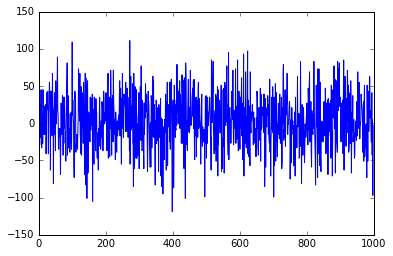

In [11]:
plt.plot(map_model)

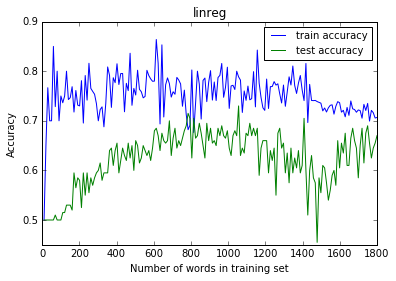

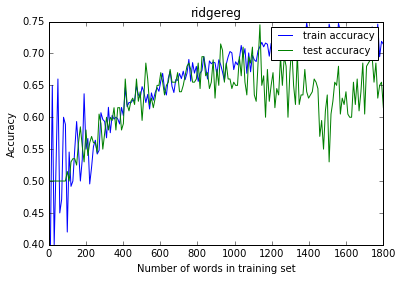

In [33]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/linear_model.html
# verb vs not verb. present tense
def Xy(words):
    X = []
    for word in words:
        enc = encode(word, 3)
        rand_enc = encode(''.join([random.choice(alphabet) for j in range(len(word))]), 3)
        X.append(enc)
        X.append(rand_enc)
    X = np.asarray(X)
    y = np.ones(len(words)*2)
    y[y.shape[0]/2:] = 0
    return X, y

def past_presXy(pres, past):
    X = np.zeros((len(pres)*2, N))
    seen = encodes(pres, past)
    for i in range(len(seen)):
        X[i] = seen[i][0]
        X[i + len(pres)] = seen[i][1]
    y = np.ones(len(pres)*2)
    y[y.shape[0]/2:] = 0
    return X, y

def graph(ys):
    for y in ys:
        plt.figure()
        plt.plot(y[1], label=y[0])

def regression(X_train, y_train, X_test, y_test, modeltype="linreg"):
    regr = linear_model.LinearRegression()
    if modeltype == "ridgereg":
        regr = linear_model.Ridge(alpha = .5)
    train_mse, train_var_score, train_acc, test_mse, test_var_score, test_acc = [],[],[],[],[],[]
    for i in range(10, X_train.shape[0], 10):
        # need to shuffle
        bindices = np.random.choice(X_train.shape[0], i)
        X, y = X_train[bindices], y_train[bindices]
        regr.fit (X, y)
        train_preds = regr.predict(X) > 0
        test_preds = regr.predict(X_test) > 0
        # train mean squared error
        train_mse.append(np.mean((train_preds - y) ** 2))
        # Explained variance score: 1 is perfect prediction
        train_var_score.append(regr.score(X, y))
        # train accuracy
        train_acc.append(accuracy_score(y, train_preds))
        test_mse.append(np.mean((test_preds - y_test) ** 2))
        test_var_score.append(regr.score(X_test, y_test))
        test_acc.append(accuracy_score(y_test, test_preds))

    xaxis = np.linspace(10, X_train.shape[0], len(train_acc))
    plt.figure()
    plt.plot(xaxis, train_acc, label="train accuracy")
    plt.plot(xaxis, test_acc, label="test accuracy")
    plt.title(modeltype)
    plt.ylabel("Accuracy")
    plt.xlabel("Number of words in training set")
    plt.legend(loc=1,prop={'size':10})
    
    """
    graph([["train mean squared error", train_mse], 
           ["train explained variance score", train_var_score], 
           ["train accuracy", train_acc], 
           ["test mean squared error", test_mse], 
           ["test explained variance score", test_var_score], 
           ["test accuracy", test_acc]])
    """

# "is a present tense verb or a past tense verb"
X_train, y_train = past_presXy(words, past_tense)
X_test, y_test = past_presXy(test_words, test_past_tense)
regression(X_train, y_train, X_test, y_test)
regression(X_train, y_train, X_test, y_test, "ridgereg")

In [12]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# or 
# http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
# does not guarantee large/good margin.
"""
TODO:
do perceptron learning rule version of hypervec algo
way to regularize:
if already right/generalize, then add exact answer for “jumped” with smaller weight.
"""
def perceptron(X_train, y_train, X_test, y_test):
    unit_step = lambda x: 0 if x < 0 else 1
    mu, sigma = 0, 1
    w = np.random.normal(mu, sigma, N)
    errors = []
    eta = 0.2
    n = 100

    selected_indices = np.random.choice(X_train.shape[0], n)
    for i in selected_indices:
        x, y = X_train[i], y_train[i]
        result = np.dot(w, x)
        error = y - unit_step(result)
        errors.append(error)
        w += eta * error * x

    results = np.dot(X_train, w)
    test_results = np.dot(X_test, w)
    preds = results > 0
    test_preds = test_results > 0
    
    print("Train accuracy: %.2f"
          % accuracy_score(y_train, preds))
    print('Test accuracy: %.2f' % accuracy_score(y_test, test_preds))

    

# verb vs not verb. present tense
X_train, y_train = Xy(words)
X_test, y_test = Xy(test_words)
perceptron(X_train, y_train, X_test, y_test)
# present tense verb vs past tense verb
X_train, y_train = past_presXy(words, past_tense)
X_test, y_test = past_presXy(test_words, test_past_tense)
perceptron(X_train, y_train, X_test, y_test)

Train accuracy: 0.57
Test accuracy: 0.45
Train accuracy: 0.66
Test accuracy: 0.53
